# Food interactions - data analysis & cleaning

The food interaction descriptions are not introduced in a unified format and therefore represent data which needs to be analysed and cleaned before proper use. The final goal is to have the shortest possible descriptions which can be used in FCA.

## I. Analysis

The first step is to get to know the data. The findings of this part are:
* 1194 food interaction descriptions
* 498 unique food interaction descriptions
* multiple sentence descriptions, which can be split into separate descriptions
* redundant descriptions which can be removed (ex.  'No food effects.', 'No known food interactions.')

In [2]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [14]:
food_df = pd.read_csv('../initial_data/food_interactions.csv')
food_df.rename(columns=food_df.iloc[0]).drop(food_df.index[0]);

In [15]:
food_df['description'] = food_df['description'].str.strip(); #Remove spaces from the beginning and end

In [3]:
food_df.head()

,drug_id,description
0,DB00006,"Dan shen, dong quai, evening primrose oil, gin..."
1,DB00006,Echinacea
2,DB00008,Recommended adequate hydration.
3,DB00011,Avoid alcohol.
4,DB00034,Avoid alcohol.


In [4]:
unique_interaction = food_df['description'].unique().tolist()
sorted(unique_interaction)[:20]

['A food effect study conducted in patients with a single 4 mg dose of ixazomib showed that a high-fat meal decreased ixazomib AUC by 28% and Cmax by 69%.',
 'A high fat meal may lower mean Cmax and increase mean AUC(0-∞) but these changes are not clinically significant. Take without regards to meals.',
 'A high fat meal significantly increases Cmax but this effect is not clinically relevant. May take dalfampridine without regard to meals',
 'A high-fat meal increased the extent and rate of naloxegol absorption. The Cmax and AUC were increased by approximately 30% and 45%, respectively. In clinical trials, naloxegol was dosed on an empty stomach approximately 1 hour prior to the first meal in the morning.',
 'A mean delay in time to peak concentration of 2.5 hours is observed with the intake of a high-fat meal, with no significant differences in AUC.',
 'Abacavir is partly metabolised through the alcohol-dehydrogenase enzyme system.',
 'Absorption does not seem to be affected by milk o

NOTE: Long descriptions won't be good for graphs

We have 498 unique food interaction descriptions

In [10]:
len(unique_interaction)

498

We have 1194 food interactions

In [49]:
food_df.shape

(1194, 2)

Find similar strings with fuzzyWuzzy:

In [16]:
process.extract('Alcohol', unique_interaction, scorer=fuzz.token_sort_ratio)

[('Avoid alcohol.', 70),
 ('Avoid alcohol', 70),
 (' Avoid alcohol.', 70),
 ('avoid alcohol ', 70),
 ('Ethanol', 43)]

In [5]:
res = [i for i in unique_interaction if "Alcohol" in i or "alcohol" in i] 

In [6]:
res

['Avoid alcohol.',
 'Alcohol may increase the vasodilatory effects of ramipril.',
 'Avoid alcohol',
 'Take with food to reduce irritation. Avoid alcohol.',
 'Avoid excessive or chronic alcohol use.',
 'Avoid alcohol (may increase CNS effects).',
 'Avoid alcohol (may increase risk of hepatotoxicity).',
 'Take without regard to meals. Avoid alcohol.',
 'Take without regard to meals. Avoid alcohol. Usually diluted in fruit juice.',
 'Alcohol increases clobazam absorption by 50%.',
 'People taking this product who drink large amounts of alcohol are exposed to a higher risk of liver toxicity.',
 'Take with food to reduce irritation, limit caffeine intake. Avoid alcohol.',
 'Take with food. Avoid alcohol.',
 'Avoid excessive or chronic alcohol consumption.',
 'Avoid alcohol, especially with the oral solution since it contains propylene glycol which competes with alcohol for alcohol dehydrogenase metabolism.',
 'Avoid alcohol for up to 14 days after treatment has been stopped.',
 'Avoid alcoh

In [7]:
len(res)

36

In [18]:
import re

In [45]:
short = [i for i in unique_interaction if len(re.findall(r'\w+', i)) < 7] 

In [46]:
short

['Echinacea',
 'Recommended adequate hydration.',
 'Avoid alcohol.',
 'Inject subcutaneuosly 15 minutes before meal',
 'Ethanol',
 'Avoid salt substitutes containing potassium.',
 'Take with food.',
 'Avoid drastic changes in dietary habit.',
 'Take without regard to meals.',
 'Avoid high doses of caffeine.',
 'Avoid alcohol',
 'Take with food to reduce irritation.',
 'Limit caffeine intake.',
 'Folic acid needs increased.',
 'Magnesium, potassium and zinc needs increased.',
 "Avoid St.John's Wort.",
 'Avoid excessive or chronic alcohol use.',
 'Avoid taking with grapefruit juice',
 'Avoid taking with grapefruit juice.',
 'Avoid alcohol (may increase CNS effects).',
 'Avoid avocado.',
 'Absorption is not affected by food.',
 'Take with food to improve tolerance.',
 'Avoid natural licorice.',
 'Drink liberally.',
 'Food reduces bioavailability.',
 'Take on an empty stomach.',
 'Take at the same time everyday.',
 'Take with food (increases availability).',
 'Do not take with milk.',
 'Ta

**Finding:** redundant descriptions which should be deleted: 'No food effects.', 'No known food interactions.', 'No food effects were found.', 'No food effects found.', 'Food does not affect absorption.', 'Not affected by food.', 'Crofelemer is not affected by food.'

In [33]:
multipleSentences = [i for i in unique_interaction if ". " in i]

In [34]:
multipleSentences

['Delayed release capsules should not be broken or crushed, but for those patients who cannot swallow the capsules, sprinkle the contents of the capsule onto soft acidic foods (pH of ≤4.5). Alkaline foods with a higher pH will promote early release of pancrelipase followed by enzyme inactivation in the stomach.   ',
 'Alcohol may increase the vasodilatory effects of ramipril. ',
 'Herbs that may attenuate the antihypertensive effect of ramipril include: bayberry, blue cohash, cayenne, ephedra, ginger, ginseng (American), kola and licorice.  ',
 'High salt intake may attenuate the antihypertensive effect of ramipril. ',
 'Ramipril decreases the excretion of potassium. Salt substitutes containing potassium increase the risk of hyperkalemia. ',
 'Citrus fruits - Patients should avoid taking extra vitamin C (ascorbic acid) supplements and vitamin C-containing multi-vitamins during their bortezomib therapy. Ascorbic Acid may diminish the therapeutic effect of Bortezomib.',
 'Green Tea - Gre

## II. Sentence extraction

Some descriptions contain multiple sentences. In this section, I split each description into separate sentences in the dataset and added them as new rows with the corresponding drug id. In the previous steps I also identified some useless data which I also eliminated (ex. 'No food effects.', 'No known food interactions.'). Finally, I exported the cleaned data to a new csv file.

In [16]:
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters

In [17]:
punkt_param = PunktParameters()
abbreviation = ['e.g']
punkt_param.abbrev_types = set(abbreviation)
tokenizer = PunktSentenceTokenizer(punkt_param)

In [18]:
new_df = food_df.copy()
new_df['description_list'] = new_df.apply (lambda row: tokenizer.tokenize(row['description']), axis=1)

In [19]:
new_df.head()

,drug_id,description,description_list
0,DB00006,"Dan shen, dong quai, evening primrose oil, gin...","[Dan shen, dong quai, evening primrose oil, gi..."
1,DB00006,Echinacea,[Echinacea]
2,DB00008,Recommended adequate hydration.,[Recommended adequate hydration.]
3,DB00011,Avoid alcohol.,[Avoid alcohol.]
4,DB00034,Avoid alcohol.,[Avoid alcohol.]


In [20]:
del new_df['description']

In [21]:
new_df

,drug_id,description_list
0,DB00006,"[Dan shen, dong quai, evening primrose oil, gi..."
1,DB00006,[Echinacea]
2,DB00008,[Recommended adequate hydration.]
3,DB00011,[Avoid alcohol.]
4,DB00034,[Avoid alcohol.]
...,...,...
1189,DB09049,[A high-fat meal increased the extent and rate...
1190,DB09053,[Administration with food increases ibrutinib ...
1191,DB09083,[Grapefruit juice may increase ivabradine expo...
1192,DB09570,[A food effect study conducted in patients wit...


In [22]:
import numpy as np

In [23]:
lst_col = 'description_list'
split_df = pd.DataFrame({     
    col:np.repeat(new_df[col].values, new_df[lst_col].str.len())
    for col in new_df.columns.difference([lst_col])
    }).assign(**{lst_col:np.concatenate(new_df[lst_col].values)})[new_df.columns.tolist()]

In [24]:
split_df

,drug_id,description_list
0,DB00006,"Dan shen, dong quai, evening primrose oil, gin..."
1,DB00006,Echinacea
2,DB00008,Recommended adequate hydration.
3,DB00011,Avoid alcohol.
4,DB00034,Avoid alcohol.
...,...,...
1342,DB09053,Administration with food increases ibrutinib e...
1343,DB09083,Grapefruit juice may increase ivabradine expos...
1344,DB09083,Therefore grapefruit juice consumption is not ...
1345,DB09570,A food effect study conducted in patients with...


In [25]:
split_df.rename(columns = {'description_list':'description'}, inplace = True)

In [26]:
split_df.head()

,drug_id,description
0,DB00006,"Dan shen, dong quai, evening primrose oil, gin..."
1,DB00006,Echinacea
2,DB00008,Recommended adequate hydration.
3,DB00011,Avoid alcohol.
4,DB00034,Avoid alcohol.


In [27]:
drop_values = [ 'No food effects.', 'No known food interactions.', 'No food effects were found.', 'No food effects found.', 
               'Food does not affect absorption.', 'Not affected by food.', 'Crofelemer is not affected by food.']
split_df[~split_df.description.str.contains('|'.join(drop_values))]

,drug_id,description
0,DB00006,"Dan shen, dong quai, evening primrose oil, gin..."
1,DB00006,Echinacea
2,DB00008,Recommended adequate hydration.
3,DB00011,Avoid alcohol.
4,DB00034,Avoid alcohol.
...,...,...
1342,DB09053,Administration with food increases ibrutinib e...
1343,DB09083,Grapefruit juice may increase ivabradine expos...
1344,DB09083,Therefore grapefruit juice consumption is not ...
1345,DB09570,A food effect study conducted in patients with...


In [28]:
split_df.to_csv("../cleaned_data/food_interactions.csv", encoding='utf-8', index=False)

## III. Result evaluation 

This section evaluates the new, cleaned data retrieved from the previous step. The first generated graph shows an increase of short descritions but underlines the fact that there is still room for more data processing. Another graph shows the 30 most common food nouns.

In [38]:
from nltk import word_tokenize
import matplotlib.pyplot as plt

In [143]:
def getWordCount(df):
    word_count = []
    for index, row in df.iterrows():
        tokens = word_tokenize(row['description'])
        words = [word for word in tokens if word.isalpha()]
        word_count.append(len(words))
    return word_count

In [156]:
initial_word_count = getWordCount(food_df)
word_count = getWordCount(split_df)

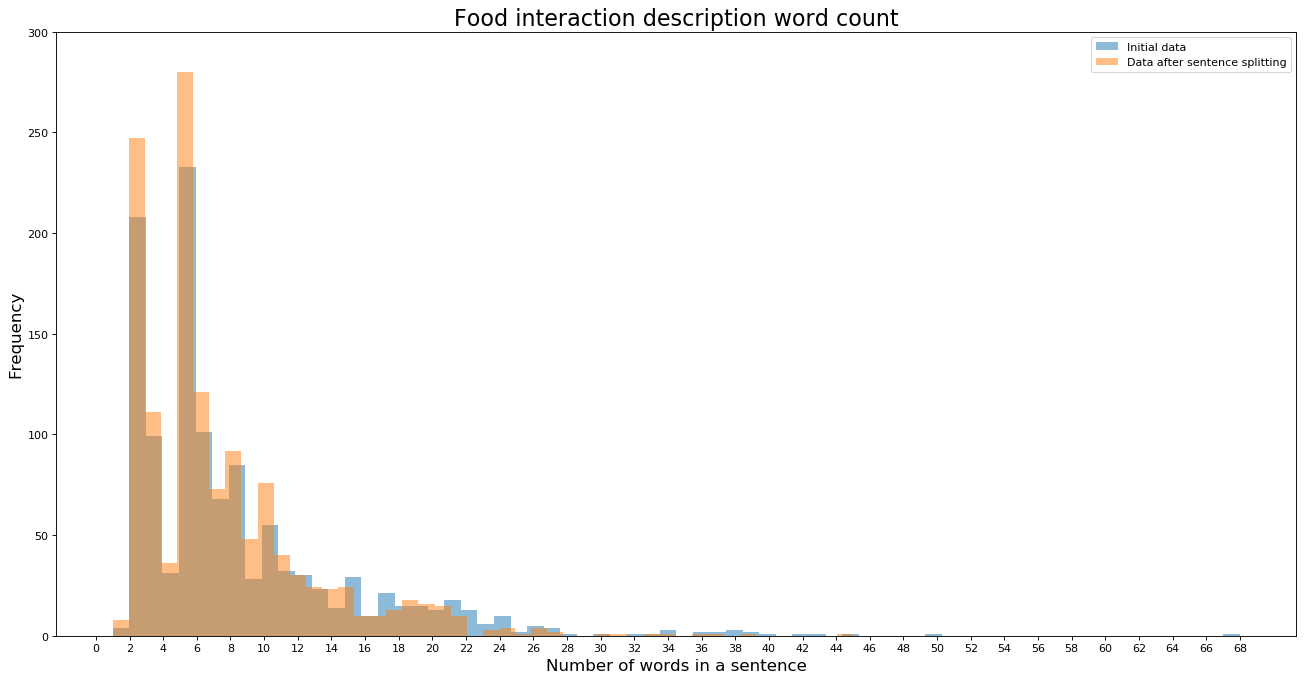

In [183]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.hist(initial_word_count, bins=68, label="Initial data", alpha=0.5) 
plt.hist(word_count, bins=46, label="Data after sentence splitting", alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel("Number of words in a sentence", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(range(0,69,2))
plt.yticks(range(0,350,50))
plt.title('Food interaction description word count', fontsize=20)
plt.show()

In [59]:
from nltk.corpus import stopwords
from nltk import pos_tag

In [69]:
def getColumnWords(df):
    word_list = []
    stop_words = set(stopwords.words('english'))
    for index, row in df.iterrows():
        nouns = [token for token, pos in pos_tag(word_tokenize(row['description'])) if pos =='NN']
        # remove tokens that are not alphabetic
        words = [word for word in nouns if word.isalpha()]
        # filter out stop words
        words = [w for w in words if not w in stop_words]
        word_list += words
    return word_list

In [29]:
cleaned_df = pd.read_csv('../cleaned_data/food_interactions.csv')

In [70]:
words_total = getColumnWords(cleaned_df)
words_total = [x.lower() for x in words_total]

In [99]:
stop_words = ["regard", "absorption", "irritation", "product", "effect", "iritation", "empty", "taken",
              "increases", "excessive", "stomach", "product", "administration",'medication','hour',"bioavailability","glass",
              "time","risk","intake","treatment","exposure","use","drug","concentration","hyperkalemia","serum","nausea","breakfast",
             "rate", "extent", "increase","excretion","juice","metabolism", "meal","day","toxicity","physician","consider","everyday"]
words_total = [w for w in words_total if not w in stop_words]

In [47]:
from nltk import FreqDist

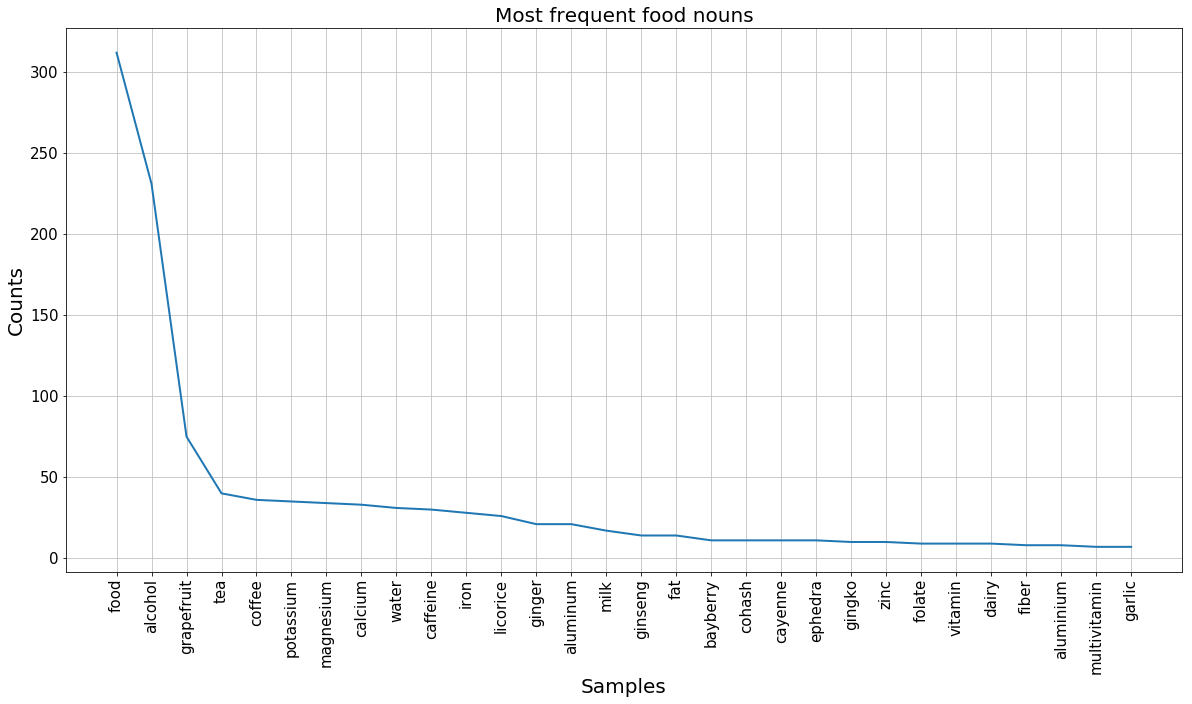

In [136]:
fd = FreqDist(words_total)
plt.figure(figsize=(20, 10))
plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.title('Most frequent food nouns', fontsize=20)
fd.plot(30,cumulative=False)
plt.show()